In [1]:
import pandas as pd
rf_res_fn = f"1649676762_all_res_df_with_perm7-8_iterall_20.0subjectsout_standard_scaled_perm_iter_normalized_perm_iter_standard_scaled_regr_iter_normalized_regr_iter.csv"
rf_res_df = pd.read_csv(rf_res_fn, index_col=None)
selected_indices = [26,27]
conf_df = rf_res_df.iloc[selected_indices]
shuffled_cond_scores = eval(conf_df.iloc[0].per_fold_score)
regular_cond_scores = eval(conf_df.iloc[1].per_fold_score)


In [2]:
import joblib
lstm_dict_res = joblib.load("res_dict_with_both_shuffle__freeze__fixed.jbl")
pd.DataFrame.from_dict(lstm_dict_res, orient='index')
normal_iter_res_df = pd.DataFrame.from_dict(lstm_dict_res['normal_iter'], orient='index')
normal_iter_res_df["iter_type"] = "normal"
shuffled_iter_res_df = pd.DataFrame.from_dict(lstm_dict_res['shuffled_iter'], orient='index')
shuffled_iter_res_df["iter_type"] = "shuffled"
res_df = pd.concat([normal_iter_res_df, shuffled_iter_res_df], axis=0)
shuffled_iter_res_df = pd.DataFrame.from_dict(lstm_dict_res['shuffled_iter'],orient='index')
shuffled_iter_res_df["iter_type"] = "shuffled"
regr_acc_l = res_df[res_df.is_shuffle_iter == False]['subj_level_acc']
rand_acc_l = res_df[res_df.is_shuffle_iter == True]['subj_level_acc']
# draw_stars_box(regr_acc_l, rand_acc_l)

In [3]:
import matplotlib.pyplot as plt
from pylab import *
import scipy.stats
from palettable.colorbrewer.qualitative import Set2_7
import seaborn as sns
def draw_stars_box(regr_acc_l, rand_acc_l, ax, subtitle):
    #https://github.com/jbmouret/matplotlib_for_papers
    # fig = figure()
    # ax = fig.add_subplot(111)
    print("Mean acc : " , np.mean(regr_acc_l))
    bp = ax.boxplot([regr_acc_l, rand_acc_l])
    params = {
        'axes.labelsize': 18,
        'font.size': 18,
        'legend.fontsize': 18,
        'xtick.labelsize': 18,
        'ytick.labelsize': 18,
        'text.usetex': False,
        # 'figure.figsize': [5, 8]
    }
    rcParams.update(params)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_visible(False)
    ax.get_xaxis().tick_bottom()
    ax.get_yaxis().tick_left()
    ax.tick_params(axis='x', direction='out', size=15)
    ax.tick_params(axis='y', length=0)
    ax.grid(axis='y', color="0.9", linestyle='-', linewidth=1)
    ax.set_axisbelow(True)
    # colors, as before
    colors = Set2_7.mpl_colors

    for i in range(0, len(bp['boxes'])):
        bp['boxes'][i].set_color(colors[i])
        # we have two whiskers!
        bp['whiskers'][i*2].set_color(colors[i])
        bp['whiskers'][i*2 + 1].set_color(colors[i])
        bp['whiskers'][i*2].set_linewidth(2)
        bp['whiskers'][i*2 + 1].set_linewidth(2)
        # fliers
        # (set allows us to set many parameters at once)
        bp['fliers'][i].set(markerfacecolor=colors[i],
                            marker='o', alpha=0.75, markersize=6,
                            markeredgecolor='none')
        bp['medians'][i].set_color('black')
        bp['medians'][i].set_linewidth(3)
        # and 4 caps to remove
        for c in bp['caps']:
            c.set_linewidth(0)
    for i in range(len(bp['boxes'])):
        box = bp['boxes'][i]
        box.set_linewidth(0)
        boxX = []
        boxY = []
        for j in range(5):
            boxX.append(box.get_xdata()[j])
            boxY.append(box.get_ydata()[j])
            boxCoords = list(zip(boxX,boxY))
            boxPolygon = Polygon(boxCoords, facecolor = colors[i], linewidth=0)
            ax.add_patch(boxPolygon)
    ax.set_xticklabels(['Actual','Shuffled'], fontsize=15)


    def stars(p):
        if p < 0.0001:
            return "****"
        elif (p < 0.001):
            return "***"
        elif (p < 0.01):
            return "**"
        elif (p < 0.05):
            return "*"
        else:
            return "-"


    z, p = scipy.stats.mannwhitneyu(regr_acc_l, rand_acc_l)

    p_value = p * 2
    s = stars(p)
    y_max = np.max(np.concatenate((regr_acc_l, rand_acc_l)))
    y_min = np.min(np.concatenate((regr_acc_l, rand_acc_l)))

    ax.annotate("", xy=(1, y_max), xycoords='data',
                xytext=(2, y_max), textcoords='data',
                arrowprops=dict(arrowstyle="-", ec='#aaaaaa',
                                connectionstyle="bar,fraction=0.2"))
    ax.text(1.5, y_max + abs(y_max - y_min)*0.1, stars(p_value),
            horizontalalignment='center',
            verticalalignment='center')
    ax.set_title(subtitle, pad=55)
    # plt.suptitle(subtitle, fontsize = 16)
    # fig.subplots_adjust(left=0.2)

    # plt.show()
    # print(f"mannwhitneyu: z = {z} , p = {p} ")

Mean acc :  0.6309999999999999
Mean acc :  0.6865


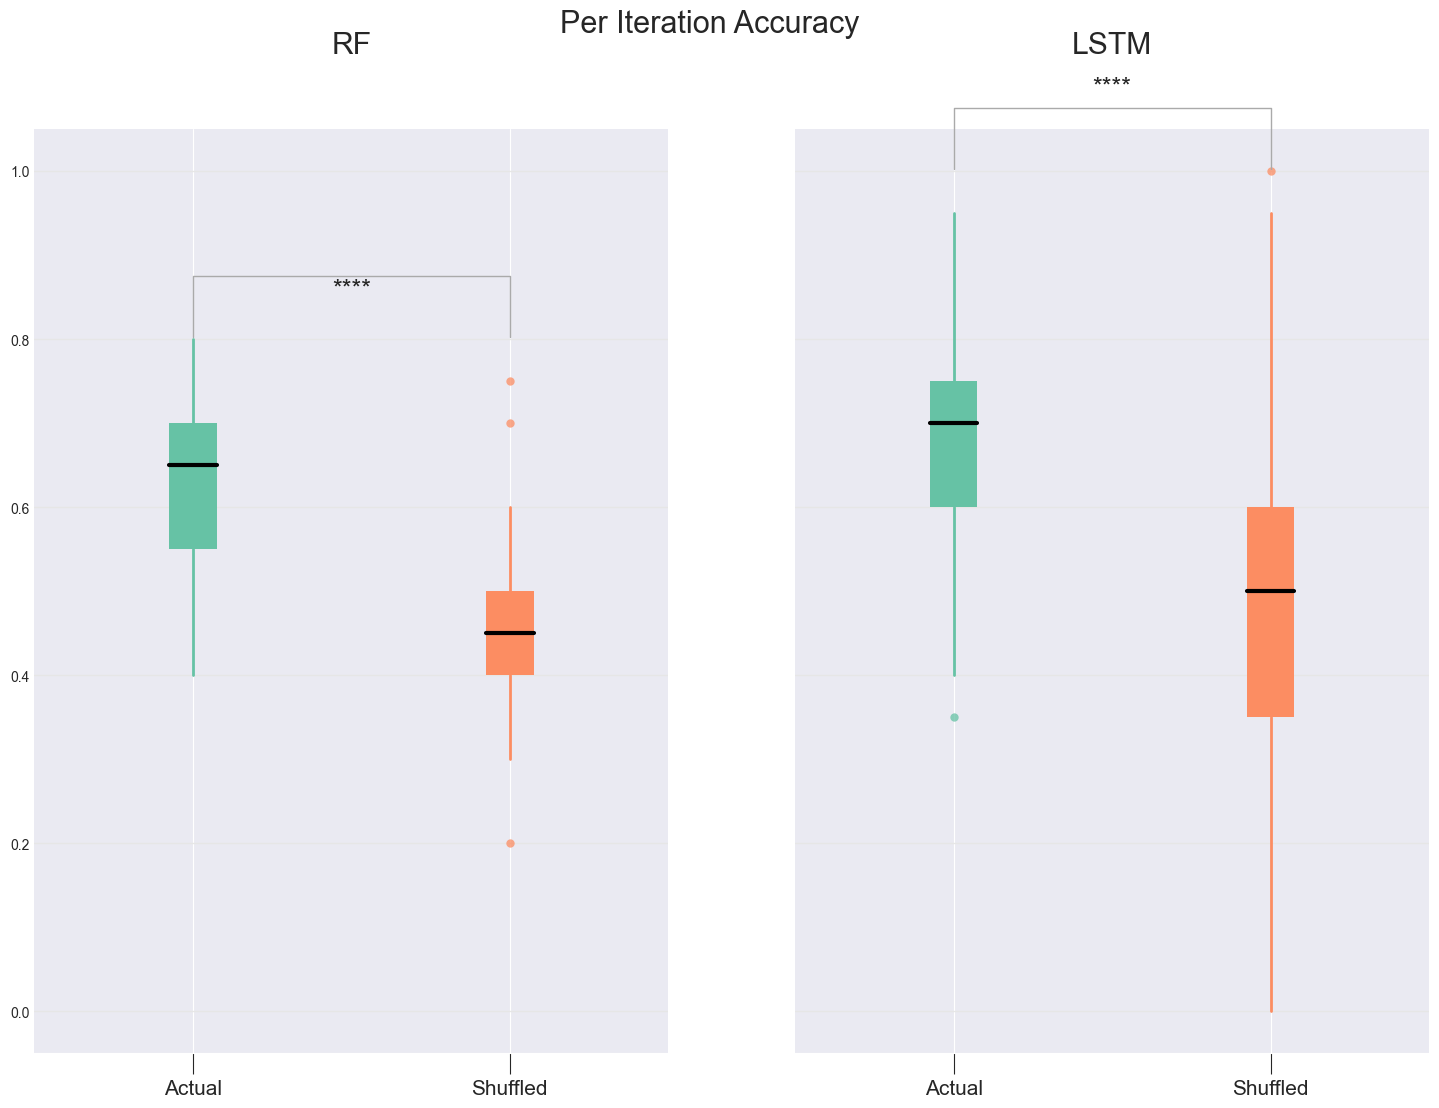

Mean acc :  0.6309999999999999
Mean acc :  0.6865


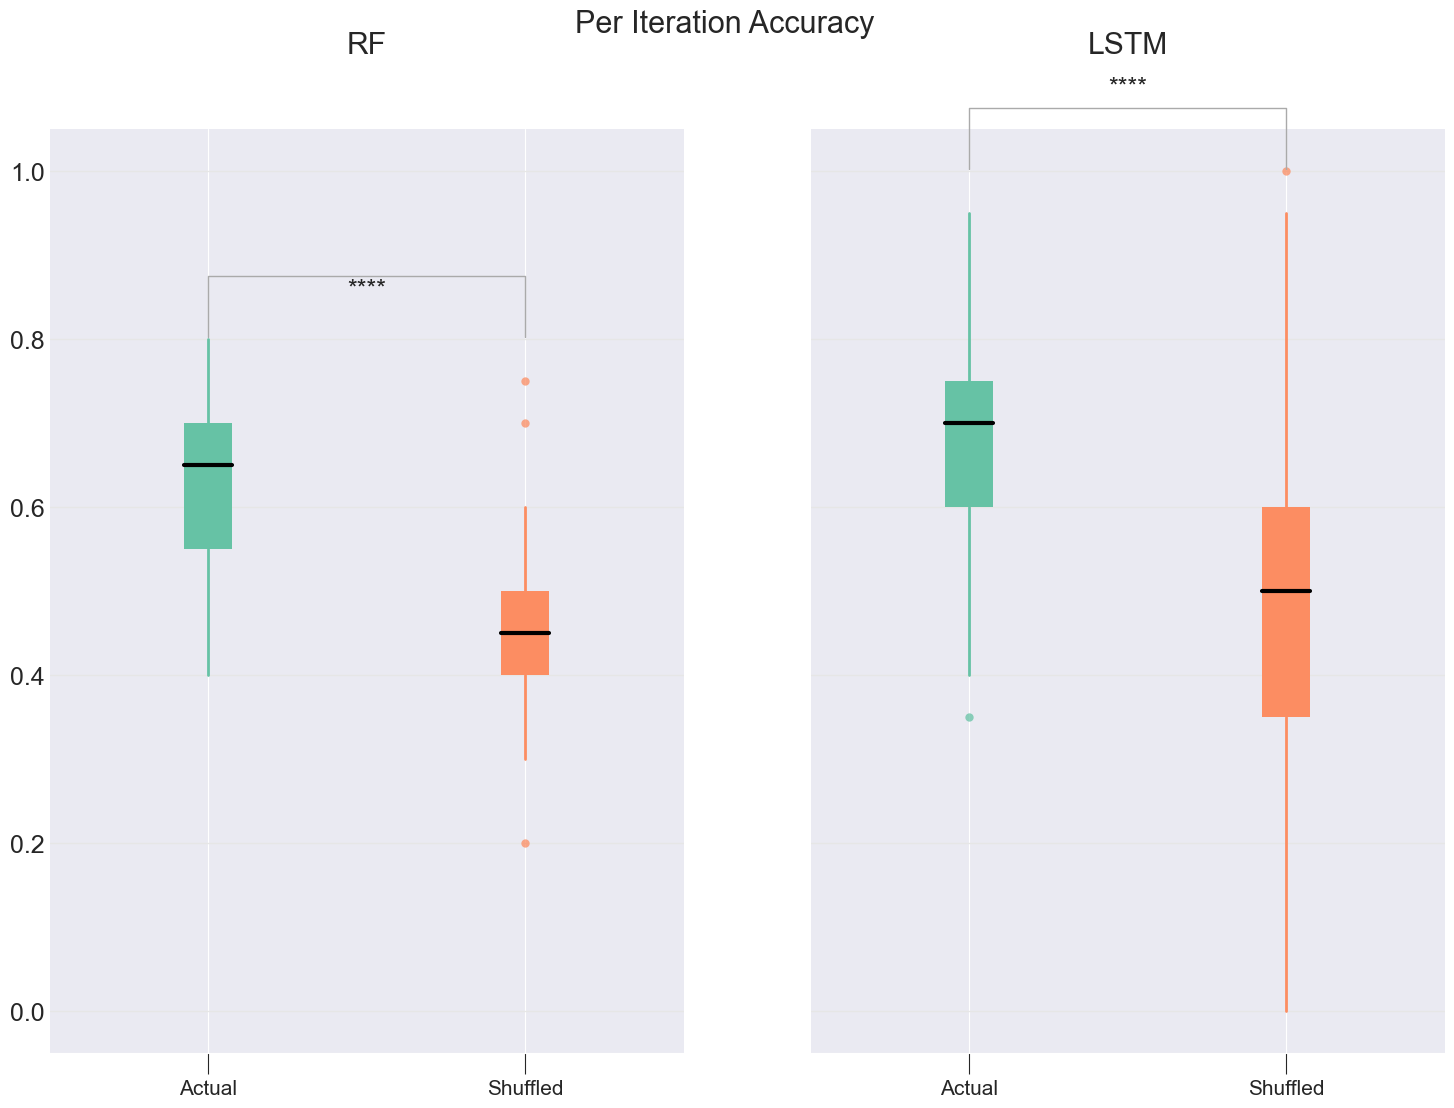

In [5]:
fig, axs = plt.subplots(1,2, sharey=True, figsize = (18,12))
fig.suptitle("Per Iteration Accuracy", fontsize = 22)
draw_stars_box(regular_cond_scores, shuffled_cond_scores, axs[0], "RF")
# axs[0].axhline(0.5, color='r')
draw_stars_box(regr_acc_l, rand_acc_l, axs[1], "LSTM")
# axs[1].axhline(0.5, color='r')